In [87]:
import numpy as np
import pandas as pd

sound_data = pd.read_csv('text/text_dataset.csv')

In [88]:
sound_data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,mom0.wav,0.392484,0.046688,3082.123742,2447.142603,5516.437785,0.193757,-390.992615,63.648804,-0.301206,...,-7.621356,-4.784069,-0.051223,-11.915295,-10.876239,-2.485626,-3.517289,-5.867061,0.530965,mom
1,mom1.wav,0.315891,0.082445,3781.634155,2325.343993,5933.543905,0.278637,-283.586914,46.690647,6.454565,...,-7.464209,-4.042662,-0.601228,-13.805180,-12.293458,-6.102067,-2.894378,-11.940088,-0.501769,mom
2,mom10.wav,0.264876,0.148314,2819.990929,2077.623126,4534.583537,0.183994,-229.786026,87.169937,-4.741657,...,-7.074800,-5.843775,-6.803321,-9.490485,-11.769225,-6.107731,0.122121,-11.206830,-2.221705,mom
3,mom11.wav,0.280394,0.108580,3188.397823,2238.687532,5117.375692,0.212020,-266.654053,69.484703,10.328805,...,-5.789814,-2.287305,-9.453332,-11.438562,-9.193639,-3.687922,-0.974449,-12.670789,0.834614,mom
4,mom12.wav,0.320213,0.104416,3120.973003,2124.136579,5077.499390,0.214010,-269.427155,65.810333,-7.878696,...,-3.361595,-6.358743,-9.215302,-7.540755,-11.724781,-5.433409,-0.186711,-11.583686,0.224419,mom


In [89]:
mom_data = sound_data[sound_data['label'] == 'mom']
pop_data = sound_data[sound_data['label'] == 'pop']
nat_data = sound_data[sound_data['label'] == 'nat']
ani_data = sound_data[sound_data['label'] == 'ani']

In [90]:
mom_mean = mom_data.mean()
pop_mean = pop_data.mean()
nat_mean = nat_data.mean()
ani_mean = ani_data.mean()

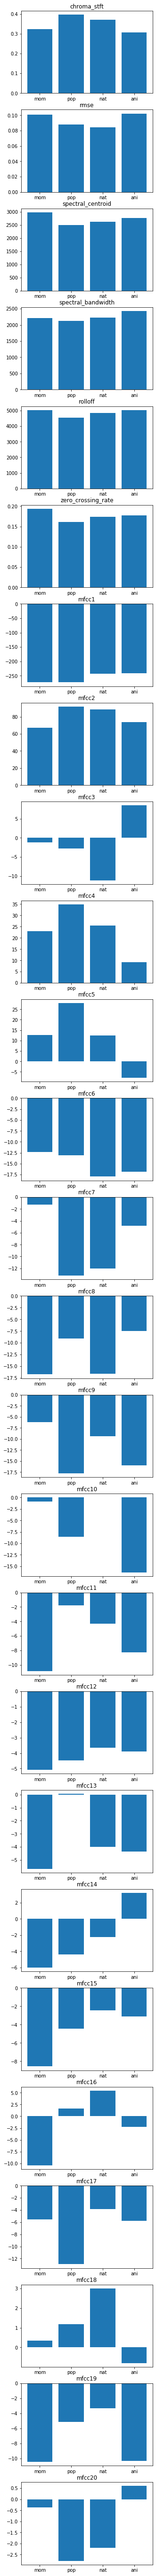

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(26, figsize=(5,100))

for i, m in enumerate(mom_mean.keys()):
    axs[i].bar(['mom', 'pop', 'nat', 'ani'], [mom_mean[m], pop_mean[m], nat_mean[m], ani_mean[m]])
    axs[i].title.set_text(m)

# Adults

In [105]:
adults_data = pd.concat([sound_data[sound_data['label'] == 'pop'], sound_data[sound_data['label'] == 'mom']])
adults_data = adults_data.replace(['mom', 'pop'], [0,1]).drop('filename', axis=1)

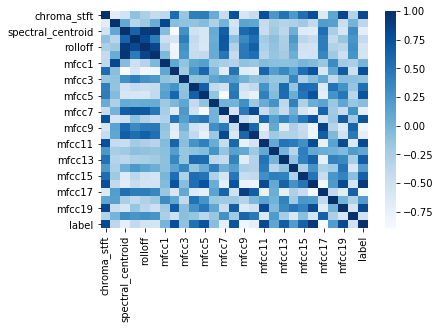

In [108]:
sns.heatmap(adults_data.corr(), cmap='Blues')

In [120]:
adults_corr = adults_data.corr('pearson')['label'].sort_values(ascending=False)
adults_corr

label                 1.000000
mfcc16                0.930736
mfcc19                0.812188
chroma_stft           0.808212
mfcc11                0.801302
mfcc2                 0.784954
mfcc5                 0.747609
mfcc8                 0.729060
mfcc13                0.665676
mfcc15                0.633575
mfcc4                 0.526289
mfcc14                0.206962
mfcc18                0.200567
mfcc12                0.123176
mfcc1                -0.006053
mfcc6                -0.084686
mfcc3                -0.124138
rmse                 -0.359295
spectral_bandwidth   -0.395070
mfcc20               -0.520137
rolloff              -0.542466
zero_crossing_rate   -0.548715
spectral_centroid    -0.705220
mfcc10               -0.717540
mfcc7                -0.722800
mfcc9                -0.825971
mfcc17               -0.862549
Name: label, dtype: float64

# Kids

label                 1.000000
mfcc10                0.936342
mfcc5                 0.893720
mfcc19                0.879576
mfcc16                0.845905
chroma_stft           0.731535
mfcc4                 0.682865
mfcc11                0.662222
mfcc9                 0.652487
mfcc18                0.629714
mfcc2                 0.565804
mfcc17                0.454732
mfcc15                0.148036
mfcc13                0.060867
mfcc12                0.046780
mfcc1                -0.060429
mfcc6                -0.081073
zero_crossing_rate   -0.084051
rolloff              -0.183413
spectral_centroid    -0.284066
rmse                 -0.580615
mfcc8                -0.596922
mfcc20               -0.610637
mfcc7                -0.629517
spectral_bandwidth   -0.635742
mfcc14               -0.662166
mfcc3                -0.889351
Name: label, dtype: float64


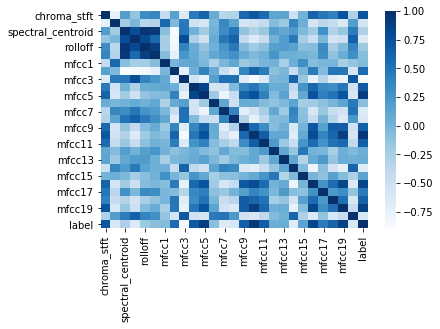

In [122]:
kids_data = pd.concat([sound_data[sound_data['label'] == 'nat'], sound_data[sound_data['label'] == 'ani']])
kids_data = kids_data.replace(['ani', 'nat'], [0,1]).drop('filename', axis=1)
sns.heatmap(kids_data.corr(), cmap='Blues')
kids_corr = kids_data.corr('pearson')['label'].sort_values(ascending=False)
print(kid_corr)

# Genders

label                 1.000000
mfcc19                0.836808
mfcc16                0.771289
chroma_stft           0.750692
mfcc11                0.722517
mfcc2                 0.683628
mfcc5                 0.641568
mfcc4                 0.547676
mfcc18                0.440442
mfcc13                0.415665
mfcc15                0.349113
mfcc10                0.279832
mfcc12                0.078811
mfcc1                -0.033643
mfcc8                -0.042985
mfcc6                -0.066648
mfcc14               -0.198958
mfcc9                -0.219094
zero_crossing_rate   -0.353250
rolloff              -0.355962
mfcc17               -0.366198
spectral_bandwidth   -0.458277
rmse                 -0.460589
spectral_centroid    -0.520931
mfcc20               -0.558998
mfcc3                -0.581121
mfcc7                -0.671003
Name: label, dtype: float64


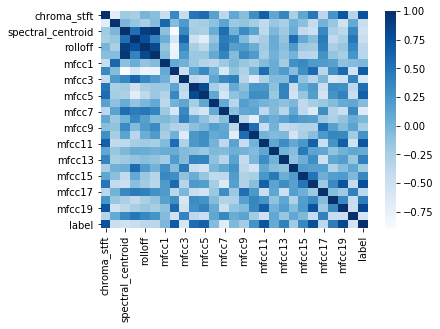

In [123]:
gender_data = sound_data.replace(['pop', 'nat', 'mom', 'ani'], [1,1,0,0]).drop('filename', axis=1)
sns.heatmap(gender_data.corr(), cmap='Blues')
gender_corr = gender_data.corr('pearson')['label'].sort_values(ascending=False)
print(gender_corr)

# Age

label                 1.000000
mfcc5                 0.647154
mfcc4                 0.459664
mfcc6                 0.365028
chroma_stft           0.258604
mfcc10                0.256188
mfcc13                0.179080
mfcc7                 0.070858
mfcc9                 0.069515
spectral_centroid     0.058289
zero_crossing_rate    0.036117
rmse                  0.020846
mfcc11                0.007436
mfcc2                -0.039112
mfcc18               -0.049638
mfcc3                -0.066375
mfcc8                -0.083634
mfcc19               -0.106590
rolloff              -0.174586
mfcc20               -0.177934
mfcc12               -0.186789
mfcc16               -0.463884
spectral_bandwidth   -0.527460
mfcc17               -0.540255
mfcc15               -0.547599
mfcc1                -0.558490
mfcc14               -0.587861
Name: label, dtype: float64


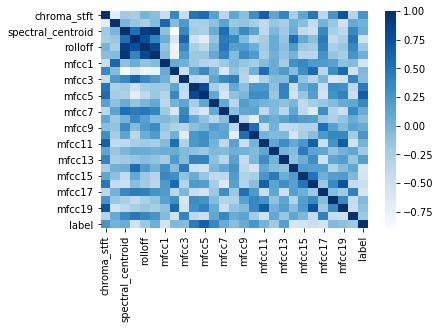

In [119]:
age_data = sound_data.replace(['pop', 'nat', 'mom', 'ani'], [1,0,1,0]).drop('filename', axis=1)
sns.heatmap(age_data.corr(), cmap='Blues')
print(age_data.corr('pearson')['label'].sort_values(ascending=False))

In [195]:
def get_correlations(threshold=0, negetive=True):
    cors = {}

    for c_vector in [adults_corr, kids_corr, gender_corr]:

        for i, n in c_vector.to_dict().items():

            if abs(n) >= threshold:
                
                if negetive == True:
                    cors[i] = cors.get(i, 0) + n
                else:
                    cors[i] = cors.get(i, 0) + abs(n)

    return cors

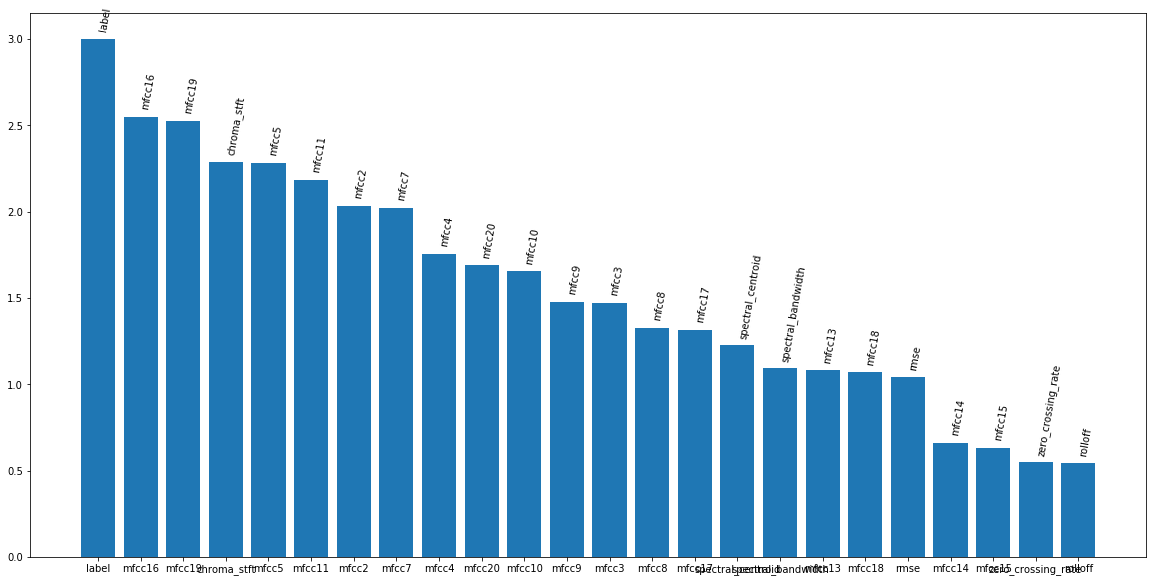

In [203]:
cors_dict = get_correlations(.4, negetive=False)

cors_dict = {k: v for k, v in sorted(cors_dict.items(), key=lambda item: item[1], reverse=True)}

fig= plt.figure(figsize=(20,10))
plt.bar(list(cors_dict.keys()), list(cors_dict.values()), align='center')

for key in cors_dict.keys():
    plt.text(key, abs(cors_dict[key] + 0.05), key, rotation=80)

In [204]:
cors_dict.keys()

dict_keys(['label', 'mfcc16', 'mfcc19', 'chroma_stft', 'mfcc5', 'mfcc11', 'mfcc2', 'mfcc7', 'mfcc4', 'mfcc20', 'mfcc10', 'mfcc9', 'mfcc3', 'mfcc8', 'mfcc17', 'spectral_centroid', 'spectral_bandwidth', 'mfcc13', 'mfcc18', 'rmse', 'mfcc14', 'mfcc15', 'zero_crossing_rate', 'rolloff'])